# A Tutorial on Biclustering

This tutorial aims to guide through biclustering of data.

## Biclustering algorithms

The available algorithms are provided by the Python package [`scikit-learn`](http://scikit-learn.org/stable/modules/biclustering.html).

In [1]:
from sklearn.cluster import bicluster

Display info on available models (only necessary to check for updates or for personal interest)

In [2]:
help(bicluster)

Help on module sklearn.cluster.bicluster in sklearn.cluster:

NAME
    sklearn.cluster.bicluster - Spectral biclustering algorithms.

DESCRIPTION
    Authors : Kemal Eren
    License: BSD 3 clause

CLASSES
    BaseSpectral(abc.NewBase)
        SpectralBiclustering
        SpectralCoclustering
    
    class SpectralBiclustering(BaseSpectral)
     |  Spectral biclustering (Kluger, 2003).
     |  
     |  Partitions rows and columns under the assumption that the data has
     |  an underlying checkerboard structure. For instance, if there are
     |  two row partitions and three column partitions, each row will
     |  belong to three biclusters, and each column will belong to two
     |  biclusters. The outer product of the corresponding row and column
     |  label vectors gives this checkerboard structure.
     |  
     |  Read more in the :ref:`User Guide <spectral_biclustering>`.
     |  
     |  Parameters
     |  ----------
     |  n_clusters : integer or tuple (n_row_clusters, n_

**NOTE:** 
* The algorithms are stochastic which means a seed value must be given for the pseudo random number generator in order to give reproduceable results.

In [3]:
SEED = 0

Currently, variants of biclustering algorithms are available in `scikit-learn`:
* **Spectral Biclustering**: Aims to rearrange the data matrix into a checkerboard structure. This algorithm may perform poorly on sparse data compared to spectral co-clustering.
* **Spectral Co-clustering**: Enables only biclusters on the data matrix digonal. This means that each row and column can only belong to exactly one bicluster. this approach may cause loss of information if e.g. the data contains genes (columns) associated with multiple conditions (rows).

Examples of patterns detected by each type of algorithm:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_checkerboard, make_biclusters

%matplotlib inline

An example of a checkerboard matrix

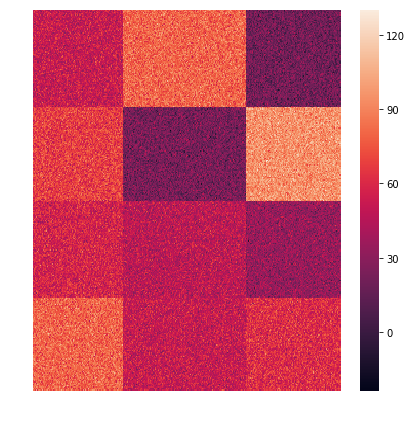

In [5]:
checker_data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=(4, 3), noise=10,
    shuffle=False, random_state=0
)
plt.figure(figsize=(6, 6))
sns.heatmap(checker_data)
plt.axis('off')
plt.tight_layout()

An example of a block diagonal matrix

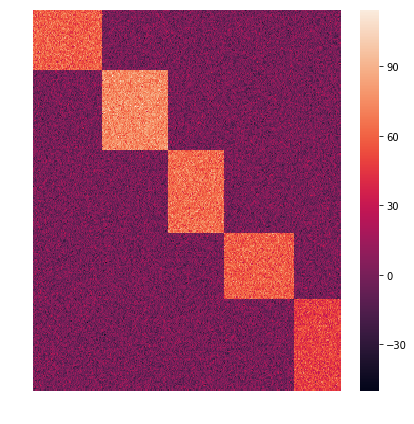

In [6]:
diag_data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=10,
    shuffle=False, random_state=0
)
plt.figure(figsize=(6, 6))
sns.heatmap(diag_data)
plt.axis('off')
plt.tight_layout()

With the spectral biclustering algorithm, the number of row and column biclusters can be specified as

In [7]:
n_biclusters = (4, 3)

The spectral co-clsutering algorithms accepts only an integer as the total number of block diagonals 

In [8]:
n_coclusters = 5

In order to perform biclustering, the biclustering algoritms/models must be *instantiated*. This means that you create an *object* of your model. A way to interperate this process is to consider the available models as templates. Once you instantiate you model, you copy a template and switch it on, ready to be used.

Instantiating the spectral biclustering and co-clustering algorithms with a seed value for the random number generator, and the assumed number of biclsuters to detect.

In [9]:
bic_model = bicluster.SpectralBiclustering(
    n_clusters=n_biclusters, random_state=SEED
)
co_model = bicluster.SpectralCoclustering(
    n_clusters=n_coclusters,random_state=SEED
)

## Visualize biclusters

To perform the actual biclustering, fit the model to the data. This way the model will predict what is biclusters and store information on which rows and columns belong to each bicluster.

In [10]:
bic_model.fit(checker_data)

SpectralBiclustering(init='k-means++', method='bistochastic',
           mini_batch=False, n_best=3, n_clusters=(4, 3), n_components=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [11]:
co_model.fit(diag_data)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=5,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

To visualize the clustering results, make a call to the local `plot_biclusters` function

In [12]:
from bic_graphics import plot_biclusters

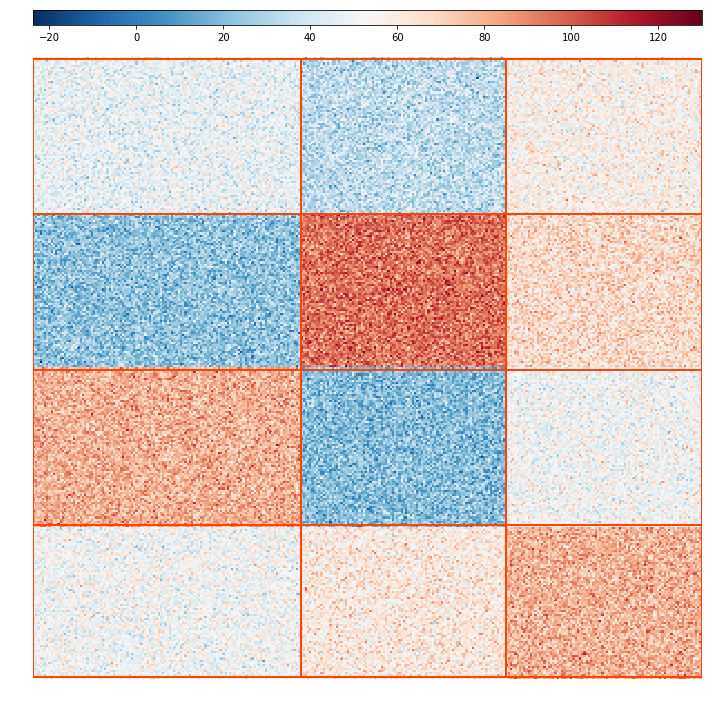

In [13]:
plot_biclusters(
    bic_model, checker_data, n_biclusters, path_to_fig=None
)
plt.tight_layout()

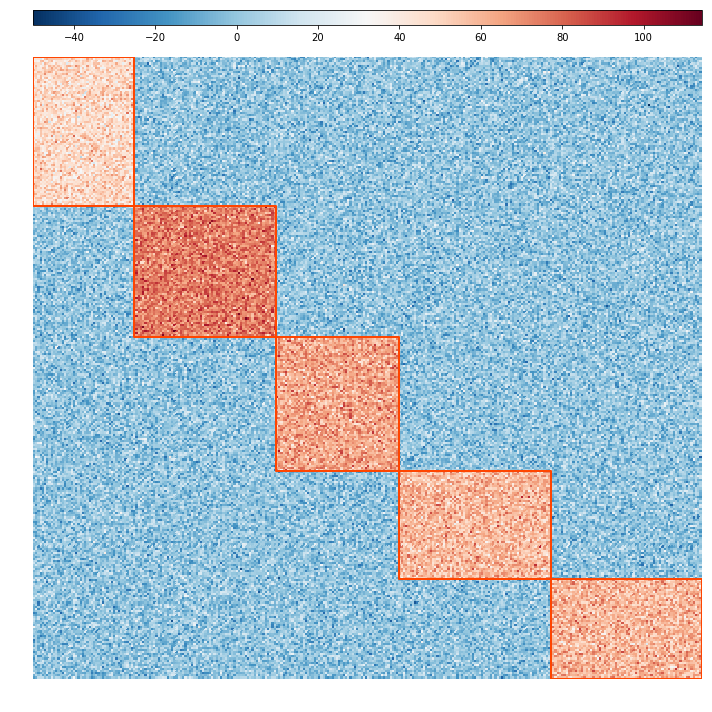

In [14]:
plot_biclusters(
    co_model, diag_data, n_coclusters, path_to_fig=None
)
plt.tight_layout()

# Example: Filtered Bonferroni corrected p-values

A complete example based on emQTL data.

## Reading data from file

When reading from file, the data is expected to follow a specific format. The structure of this format is illustrated with the *sample_data.txt*. While reading your data, the following checks are performed:
* Data type is inferred
* The value in entries containing `NaN` are replaces with zeros.

It is optional to apply the negative base-$10$ logarithm to all values in the data matrix. Import the local function to read data into memory:

In [15]:
import bic_io

Depending on the size of the data the importation may take a while.

In [16]:
data = bic_io.read_data(
    './emQTL_CorrelationMatrix_significant_pvalues.txt', log_transform=True
)

Display first part of the data

In [17]:
data.head()

,TNFRSF4,MXRA8,ATAD3A,MMP23B,SLC35E2,MORN1,KCNAB2,KLHL21,TNFRSF9,ENO1,...,ATP11C,CXorf40B,MAGEA4,MAGEA12,CETN2,PNMA5,PNMA3,TREX2,ARHGAP4,FLNA
cg00002224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00002719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00003287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perform biclustering under the conditions of specified settings

In [18]:
co_model = bicluster.SpectralCoclustering(
    init='k-means++', 
    mini_batch=True, 
    n_clusters=7,
    n_init=10, 
    n_jobs=16, 
    random_state=SEED,
    svd_method='randomized'
)

In [19]:
co_model.fit(data.values)

SpectralCoclustering(init='k-means++', mini_batch=True, n_clusters=7,
           n_init=10, n_jobs=16, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

## Visualize biclusters

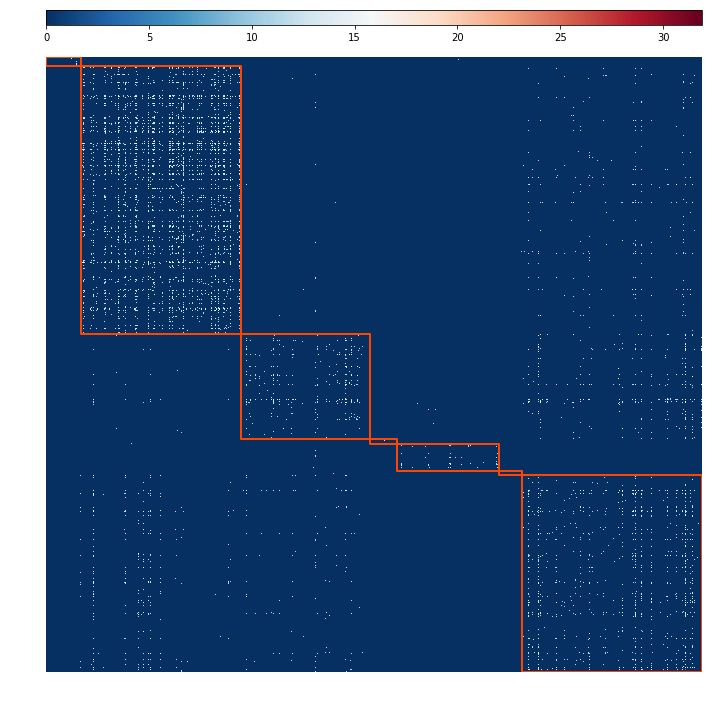

In [20]:
plot_biclusters(
    co_model, data.values, 7, path_to_fig='./outputs/test.png'
)
plt.tight_layout()

## Save results

If the biclustering was satisfactory, the row and column members can be saved in separate files on disk. Import the local bicluster representation

In [21]:
from biclusters import biclusters

Create a bicluster representation to extract row and column members of each bicluster 

In [22]:
bics = biclusters(co_model, data)
row_labels, col_labels = bics.labels

Save row and column members for each bicluster in separate files

In [23]:
bic_io.write_data(
    './outputs/sample_rows.txt', row_labels, threshold=10
)
bic_io.write_data(
    './outputs/sample_columns.txt', col_labels, threshold=10
)

The `threshold` keyword argument determines the minimum number of members required in each bicluster.